### ***Loading libraries And Data Files***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
warnings.filterwarnings(action='ignore')

In [2]:
Trian_data=pd.read_csv("../input/nslkdd/KDDTrain+.txt")

In [3]:
Test_data=pd.read_csv("../input/nslkdd/KDDTest+.txt")

In [4]:
Trian_data.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [5]:
Trian_data.drop('20',axis=1,inplace=True)

In [6]:
Test_data.drop('21',axis=1,inplace=True)

In [7]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'])

In [8]:
Trian_data.columns = columns

In [9]:
Test_data.columns = columns

In [10]:
Trian_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [11]:
Trian_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

### ***Checking Missing Values***

In [12]:
Trian_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [13]:
Trian_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### ***correlation between features ***

<AxesSubplot:>

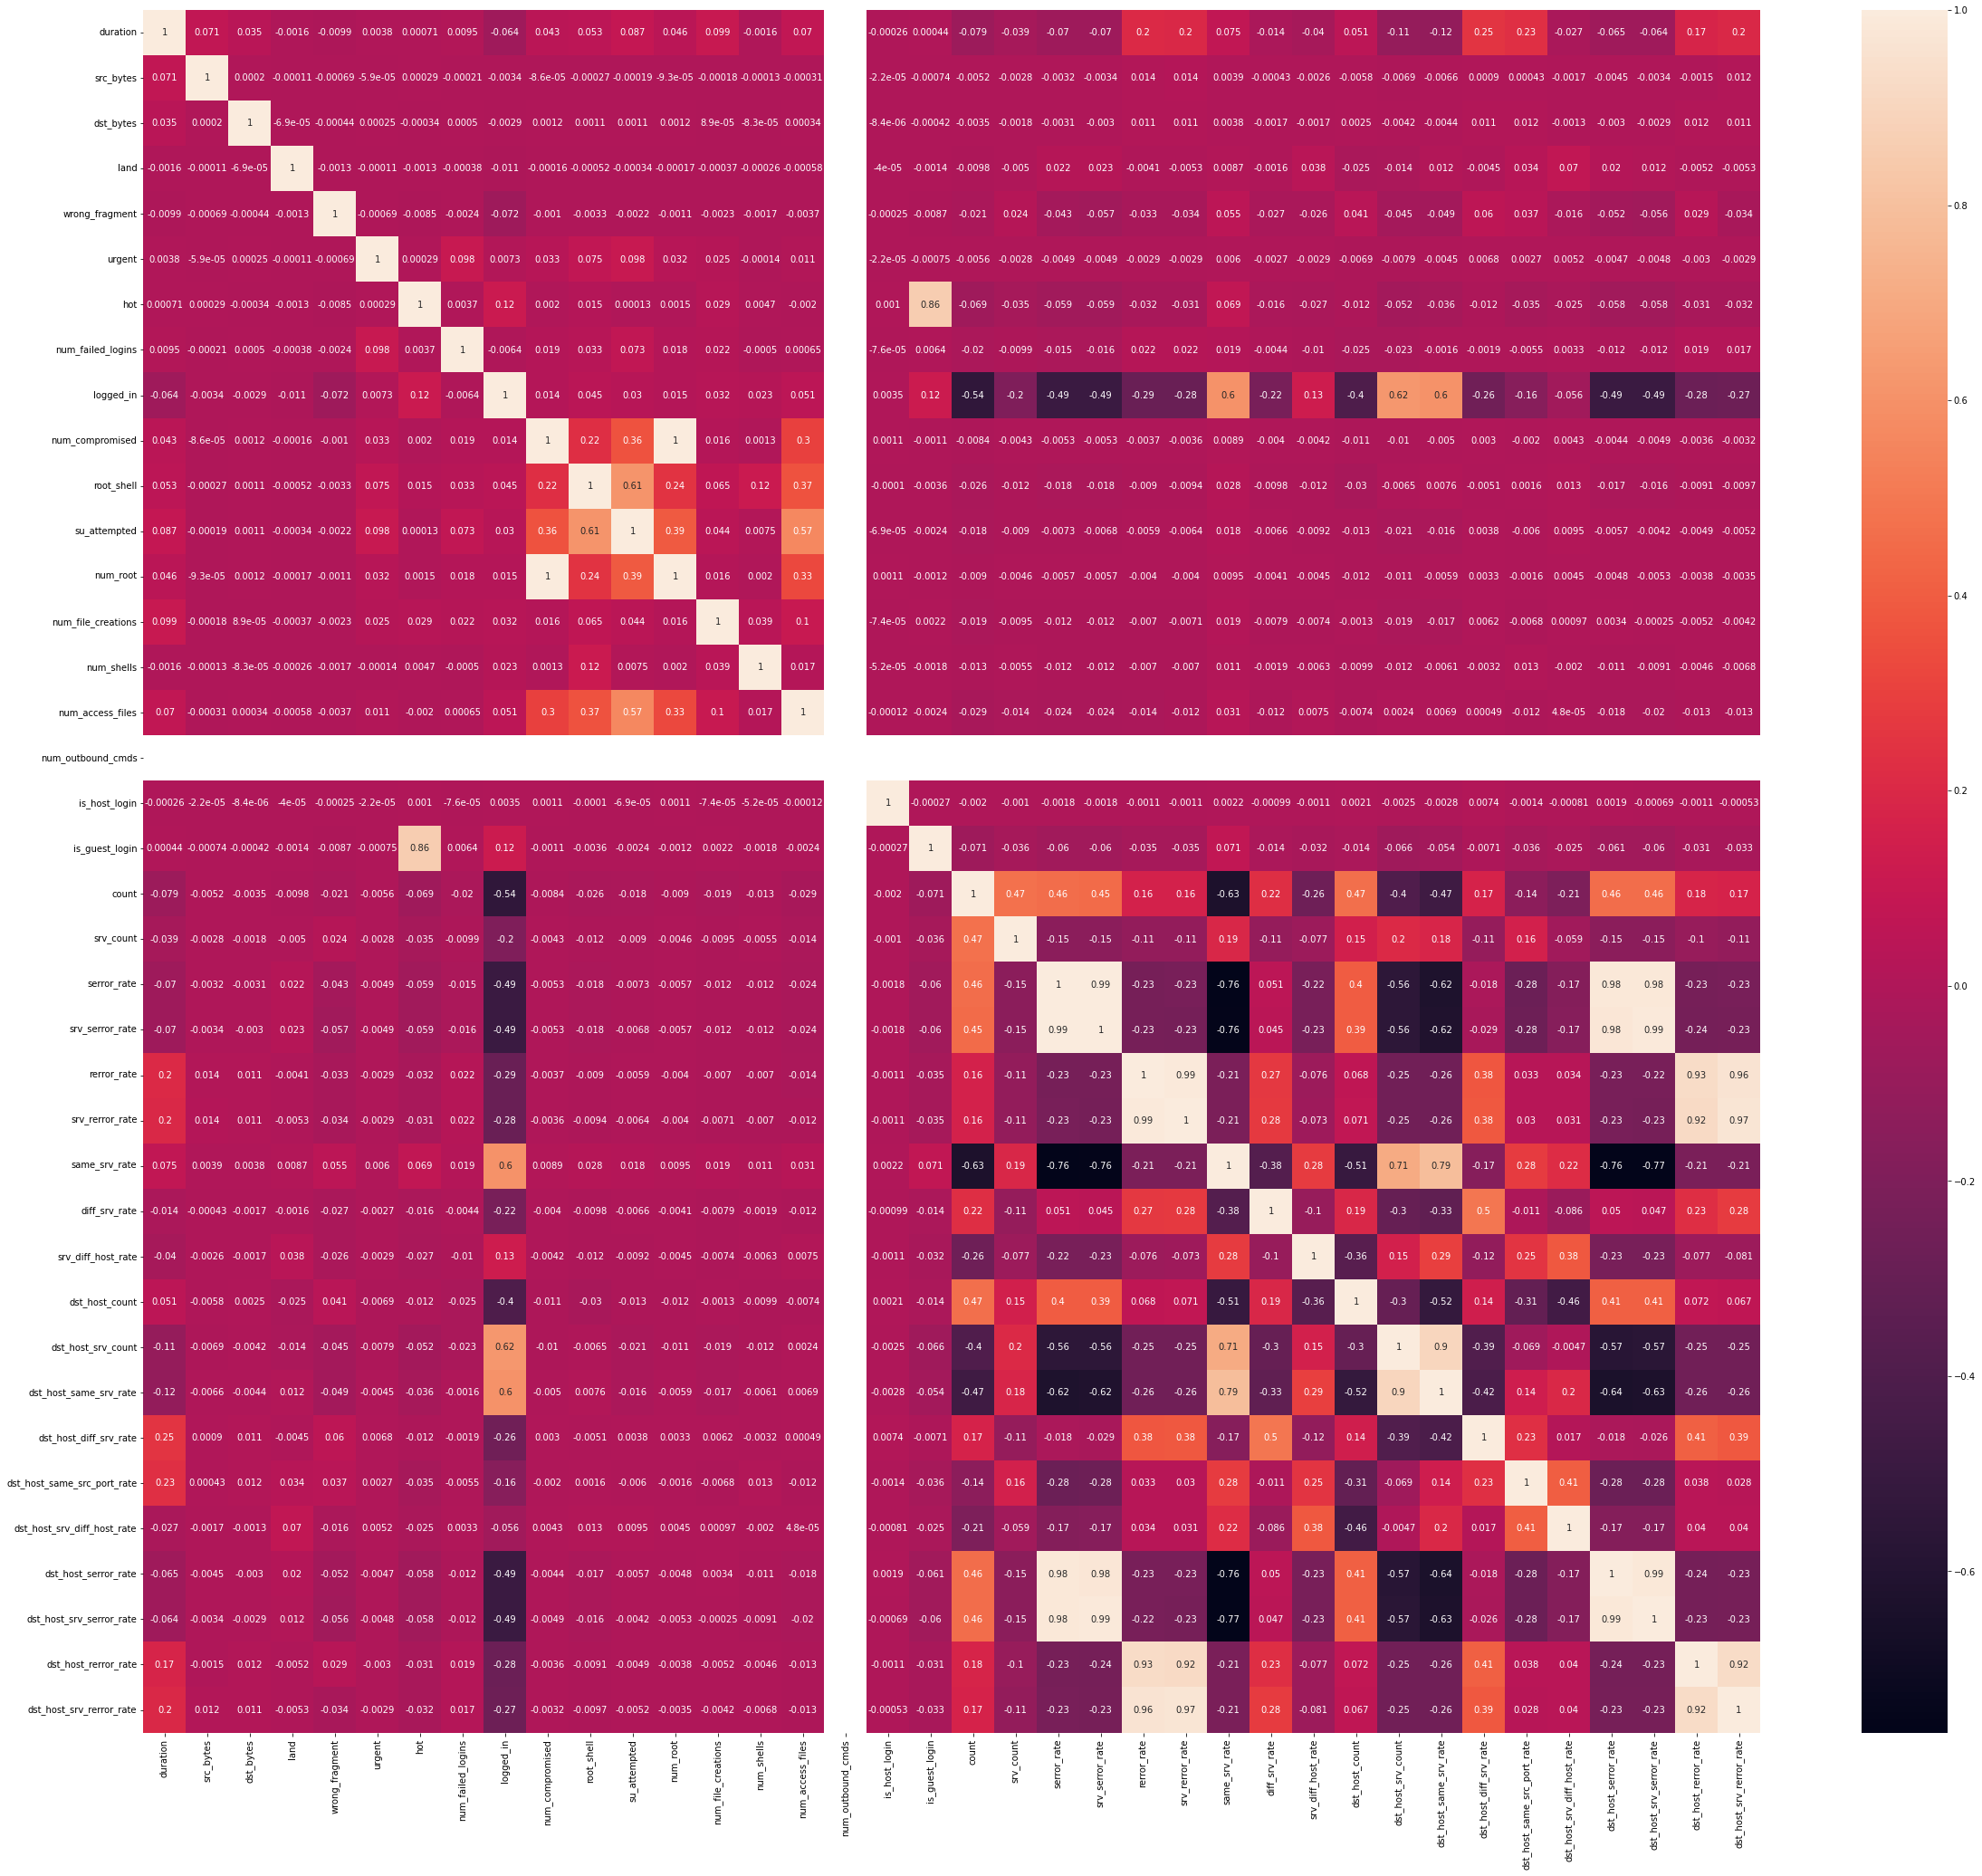

In [14]:
plt.figure(figsize=(40,35))
sns.heatmap(Trian_data.corr(), annot= True)

In [15]:
Trian_data['num_outbound_cmds'].describe()

count    125972.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: num_outbound_cmds, dtype: float64

In [16]:
Trian_data.drop('num_outbound_cmds',axis=1,inplace=True)

In [17]:
Test_data.drop('num_outbound_cmds',axis=1,inplace=True)

<AxesSubplot:>

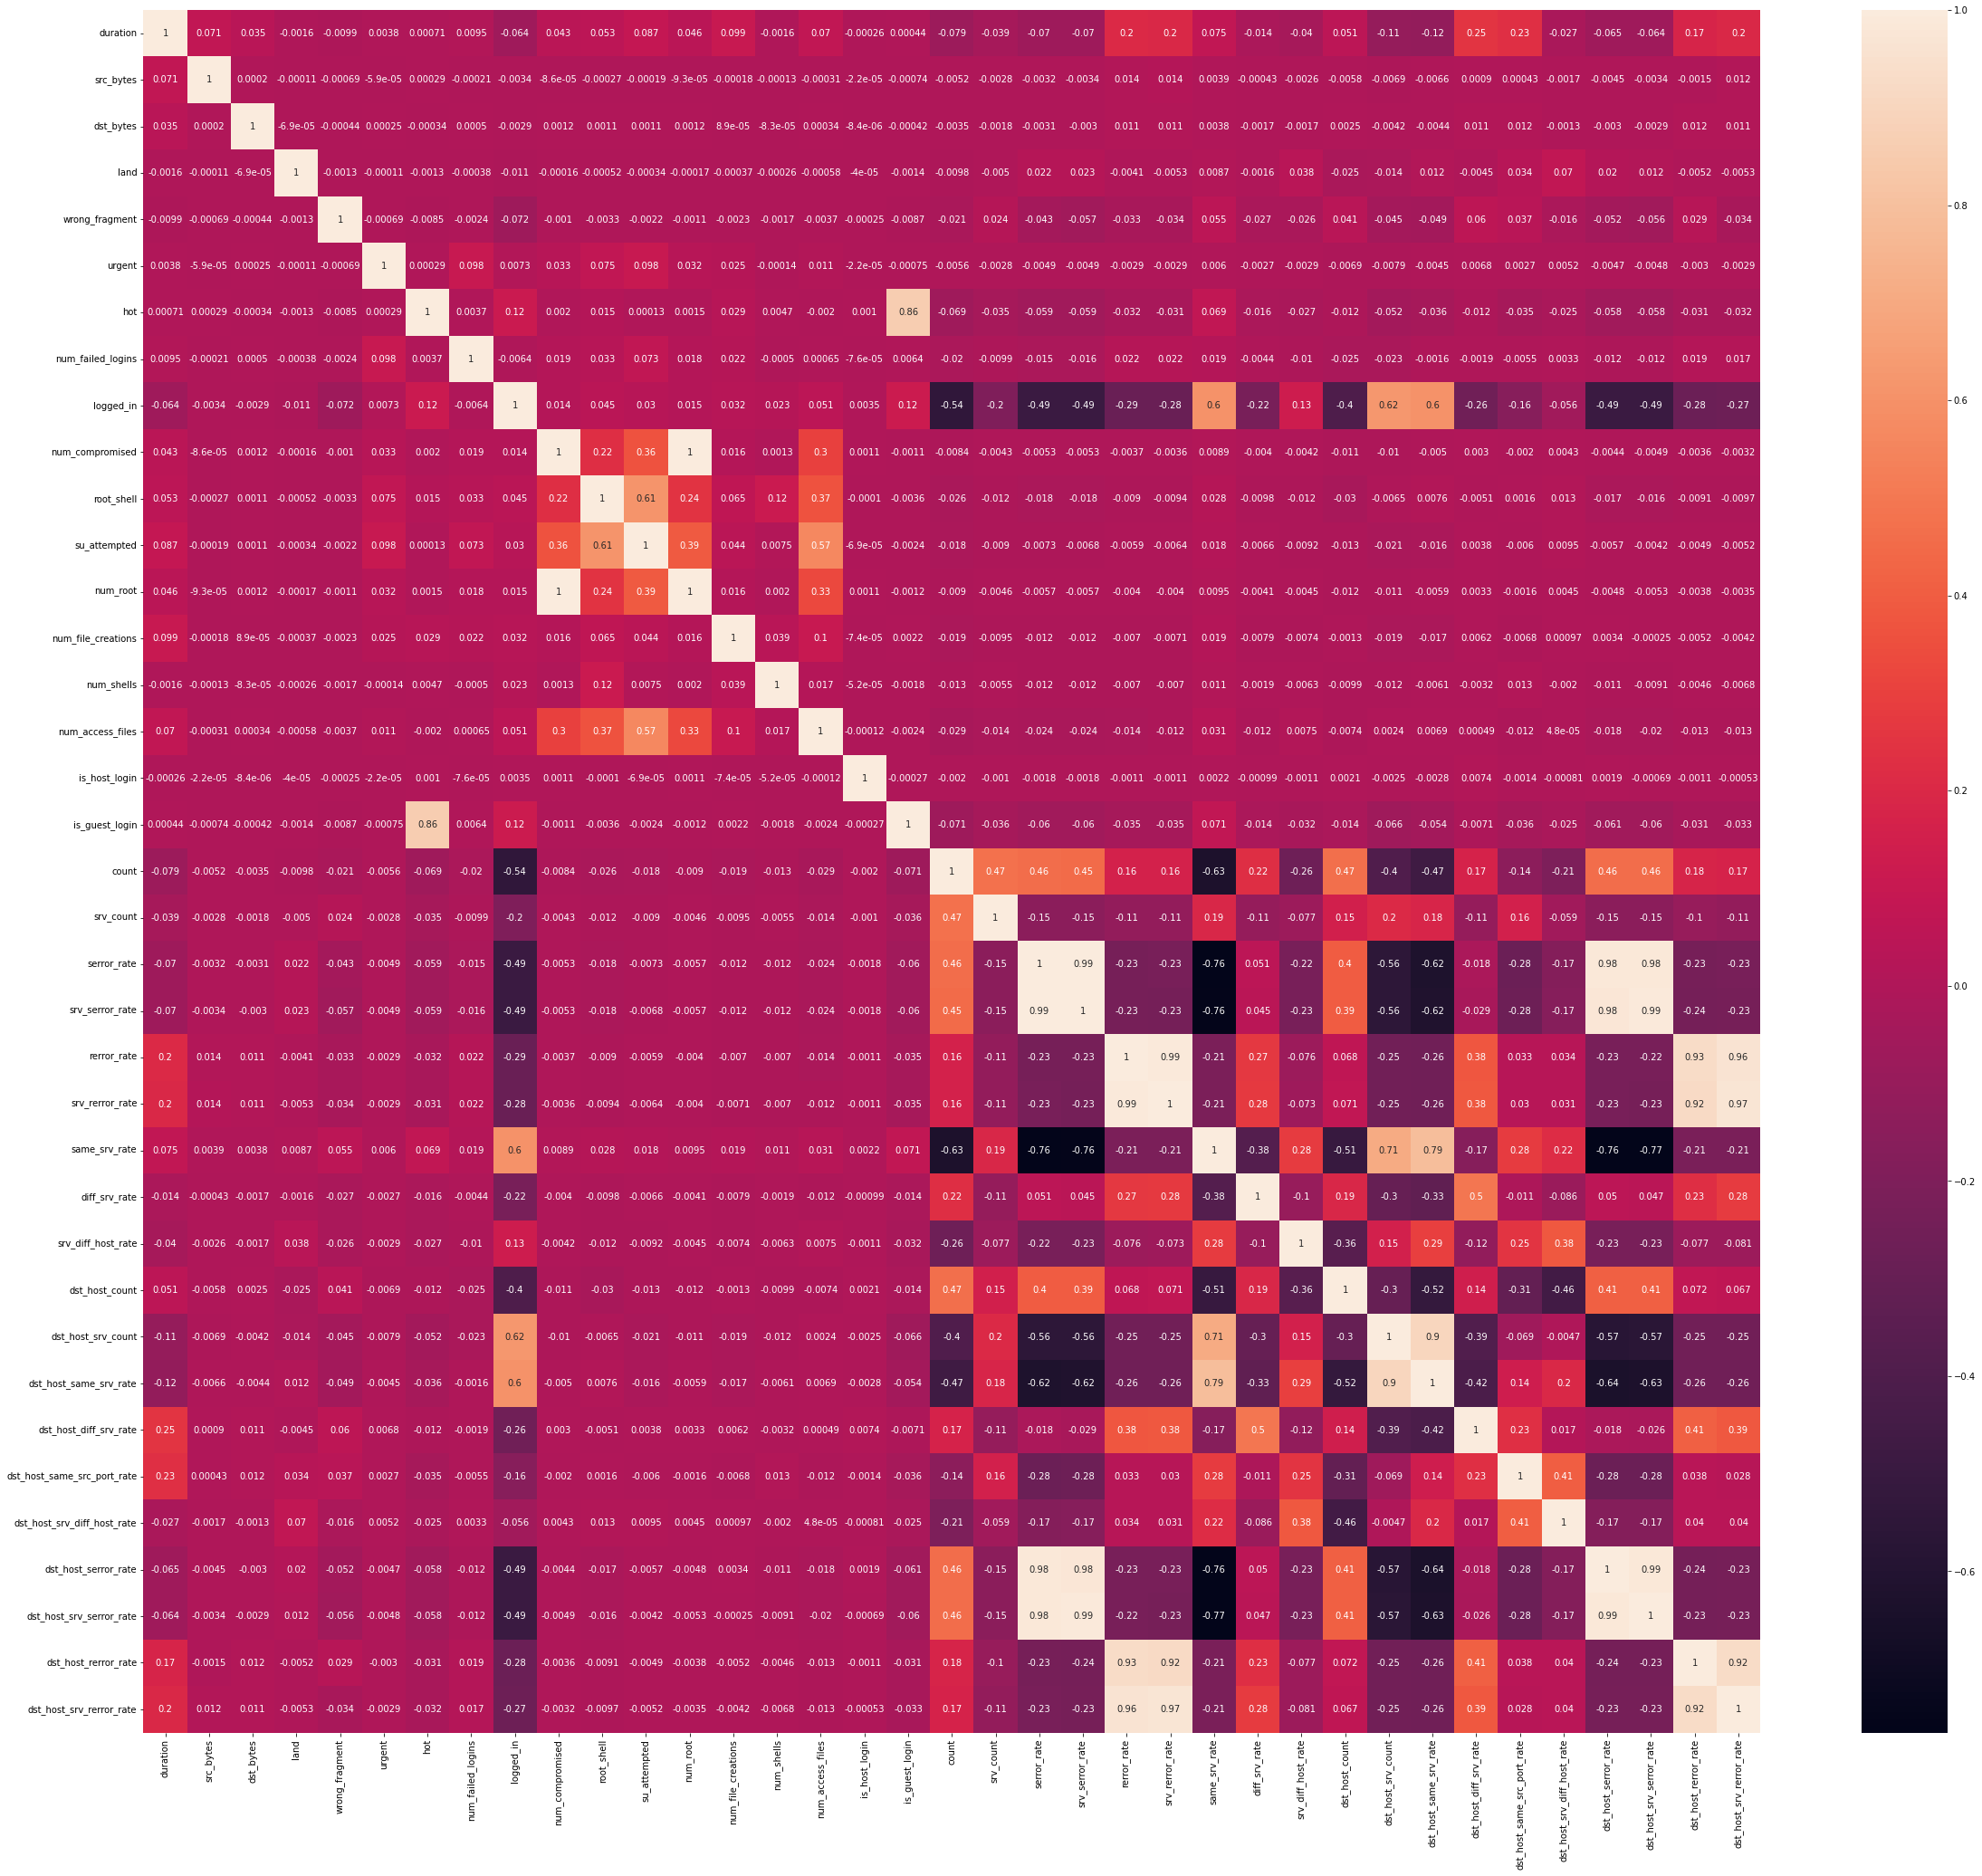

In [18]:
plt.figure(figsize=(40,35))
sns.heatmap(Trian_data.corr(), annot= True)

### ***Checking Outliers of Columns***

<AxesSubplot:>

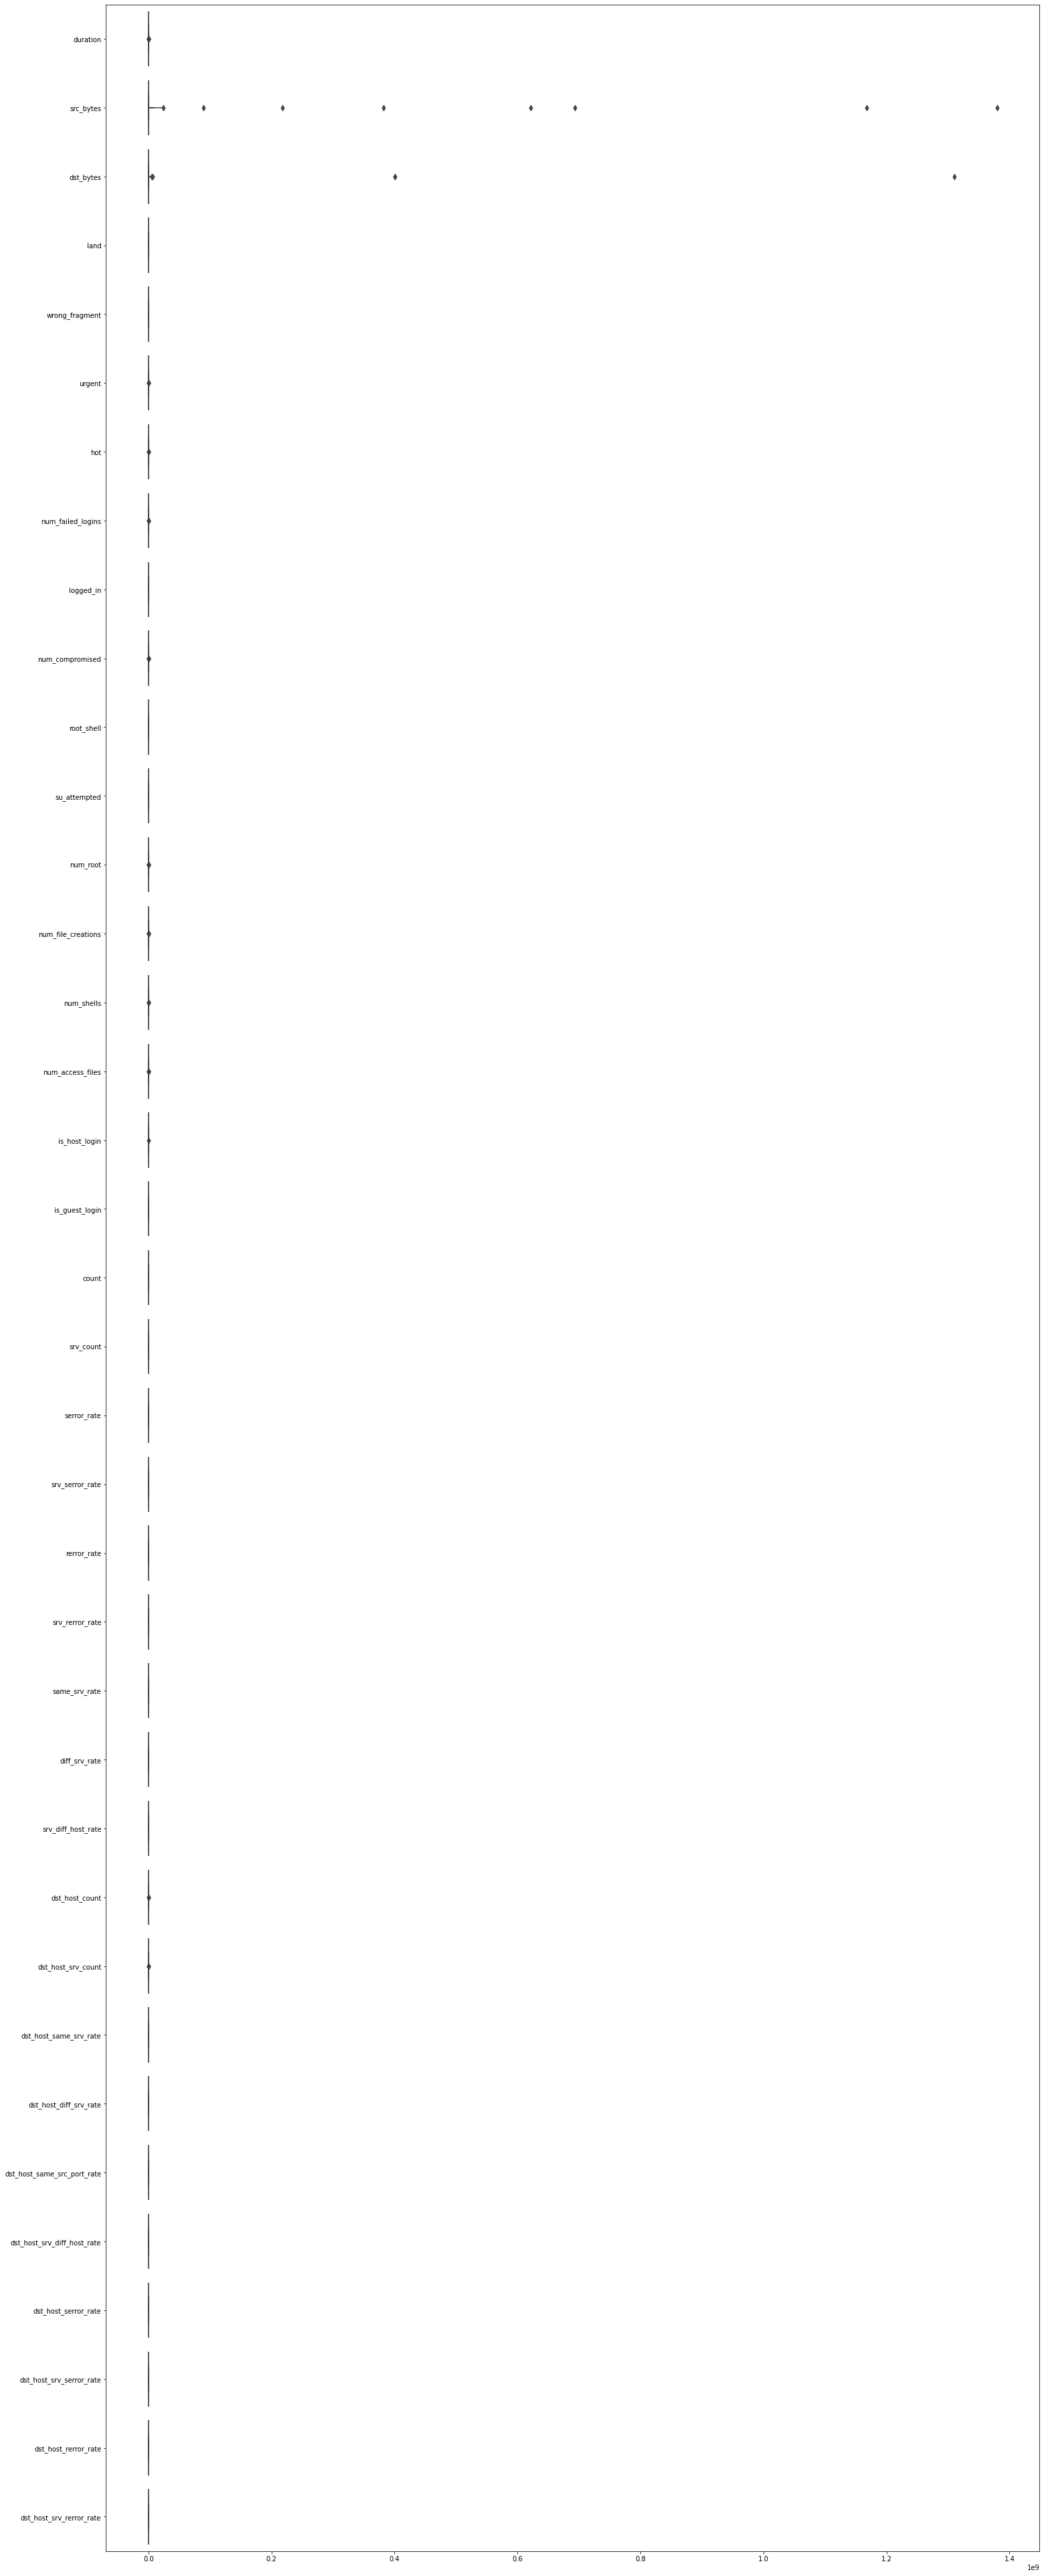

In [19]:
plt.figure(figsize=(25,70))
sns.boxenplot(data=Trian_data,orient="h")

*There are high outliers in two columns src_bytes , dst_bytes*

In [20]:
Trian_data.duplicated().sum()

0

### ***Explore Target***

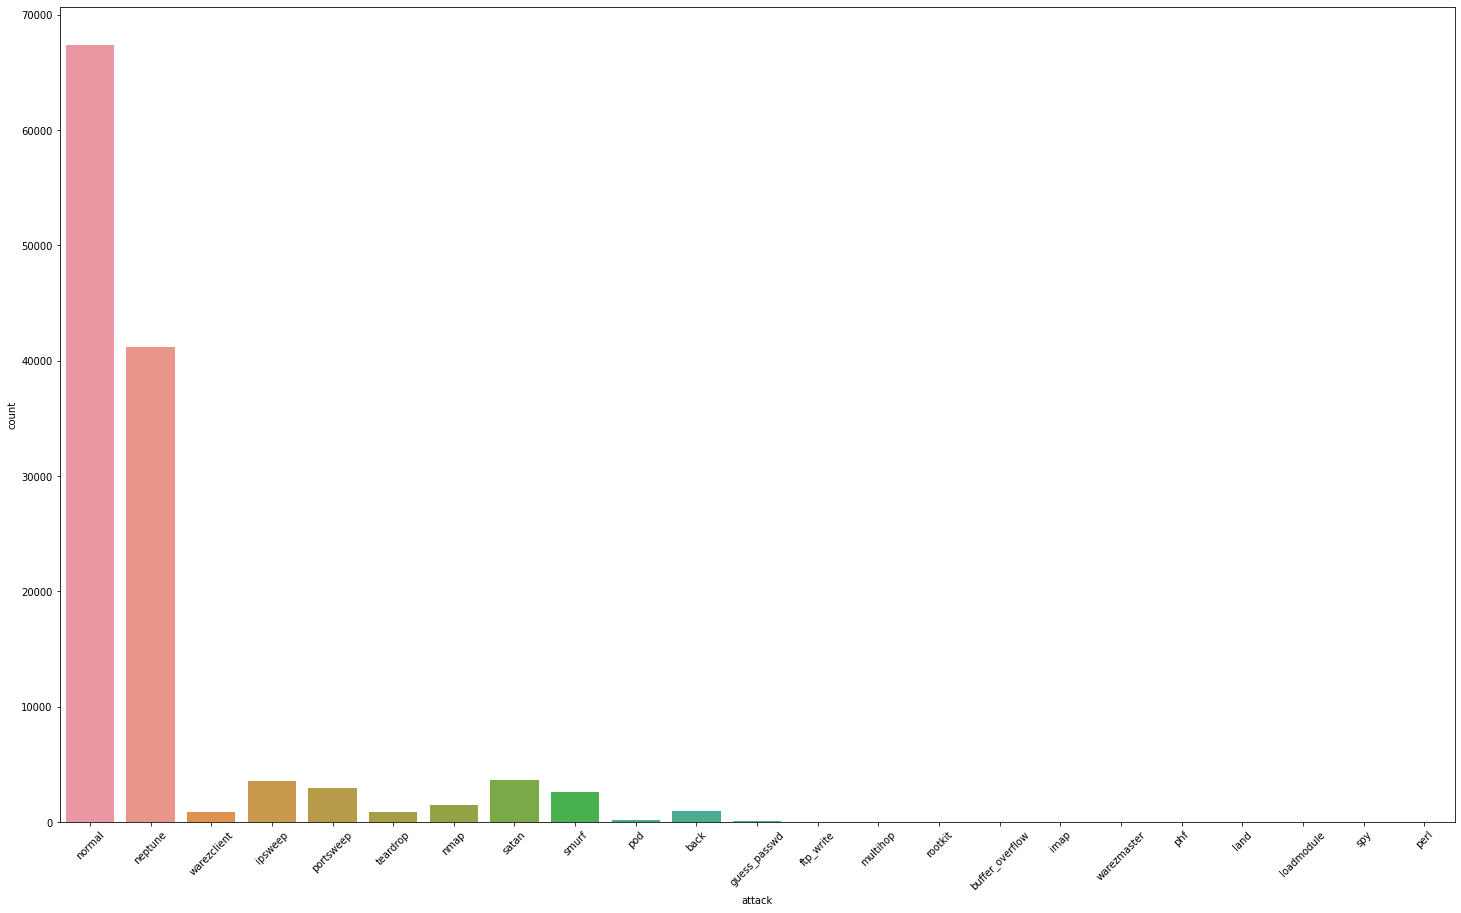

In [21]:
plt.figure(figsize=(25,15))
sns.countplot(Trian_data['attack'])
plt.xticks(rotation = 45)
plt.show()

*Handel classes in Target*

In [22]:
def attack (row):
  if(row['attack']!='normal'):
    attack=1
    return attack
  else:
    attack=0
    return attack
Trian_data['attack']=Trian_data.apply(attack,axis=1)
Test_data['attack']=Test_data.apply(attack,axis=1)

<AxesSubplot:xlabel='attack', ylabel='count'>

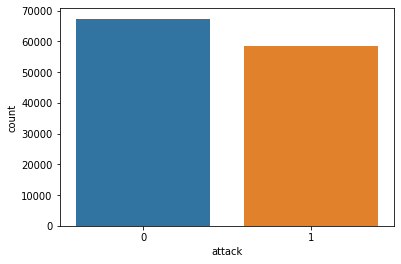

In [23]:
sns.countplot(Trian_data['attack'])

*There are No Imbalanced Data*

### ***Encoding Features***

In [24]:
ob=Trian_data.select_dtypes(['object']).columns
ob

Index(['protocol_type', 'service', 'flag'], dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder
protocol_type_le = LabelEncoder()
service_le = LabelEncoder()
flag_le = LabelEncoder()

In [26]:
Trian_data['protocol_type'] = protocol_type_le.fit_transform(Trian_data['protocol_type'])
Trian_data['service'] = service_le.fit_transform(Trian_data['service'])
Trian_data['flag'] = flag_le.fit_transform(Trian_data['flag'])

In [27]:
Test_data['protocol_type'] = protocol_type_le.fit_transform(Test_data['protocol_type'])
Test_data['service'] = service_le.fit_transform(Test_data['service'])
Test_data['flag'] = flag_le.fit_transform(Test_data['flag'])

## ***Modeling***

In [28]:
ImportantFeatures=['src_bytes','dst_bytes','srv_rerror_rate','dst_host_count','dst_host_srv_count','dst_host_diff_srv_rate', 'same_srv_rate'
,'srv_diff_host_rate','dst_host_same_srv_rate','dst_host_srv_diff_host_rate','flag','src_bytes','dst_host_srv_serror_rate','dst_host_same_src_port_rate','num_compromised','num_file_creations','dst_host_srv_diff_host_rate',
'dst_host_serror_rate']

In [29]:
x_trai = Trian_data[ImportantFeatures].values
x_train=x_trai[:10000]
y_trai= Trian_data['attack' ].values
y_train=y_trai[:10000]


In [30]:
x_train.shape

(10000, 18)

In [31]:
x_tes = Test_data[ImportantFeatures].values
x_test=x_tes[:10000]
y_tes = Test_data['attack' ].values
y_test=y_tes[:10000]

In [32]:
x_test.shape

(10000, 18)

*Reduce effects Of Outliers*

In [33]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

*Scaling Features*

In [34]:
ros_scaler = StandardScaler()
x_train = ros_scaler.fit_transform(x_train)
x_test = ros_scaler.fit_transform(x_test)

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features=15,max_depth=18)
rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=18, max_features=15)

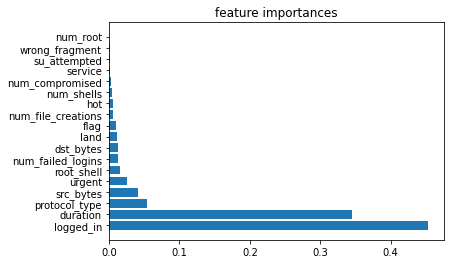

In [36]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

features_names = columns
      

f_importances(abs(rf.feature_importances_), features_names, top=18)


***linear_svc***

In [37]:
svc_linear=SVC(kernel='linear',C=1,gamma=0.01)
svc_clf_linear = svc_linear.fit(x_train,y_train)

In [38]:
svc_clf_linear.score(x_train,y_train)

0.9248

In [39]:
svc_clf_linear.score(x_test,y_test)

0.7924

In [40]:
y_pred = svc_clf_linear.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

print("precition:", metrics.precision_score(y_test, y_pred))

print("f1 score:", metrics.f1_score(y_test, y_pred))

print("recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7924
precition: 0.9152311876699909
f1 score: 0.7955082742316786
recall: 0.7034843205574913


***rbf_svc***

In [41]:
svclassifier_rbf = SVC(kernel='rbf', C = 0.01, gamma = 0.1)
svc_clf_rbf = svclassifier_rbf.fit(x_train,y_train)

In [42]:
svc_clf_rbf.score(x_train,y_train)

0.9339

In [43]:
svc_clf_rbf.score(x_test,y_test)

0.7403

In [44]:
y_pred1 = svc_clf_rbf.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred1))

print("precition:", metrics.precision_score(y_test, y_pred1))

print("f1 score:", metrics.f1_score(y_test, y_pred1))

print("recall:", metrics.recall_score(y_test, y_pred1))

Accuracy: 0.7403
precition: 0.9698056801195815
f1 score: 0.7141441937259219
recall: 0.5651567944250872


***ploy_svc***

In [45]:
svclassifier_poly = SVC(kernel='poly',C=2.5,gamma=0.1)
svc_clf_poly = svclassifier_poly.fit(x_train,y_train)

In [46]:
svc_clf_poly.score(x_train,y_train)

0.9634

In [47]:
svc_clf_poly.score(x_test,y_test)

0.7186

In [48]:
y_pred2 = svc_clf_poly.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred2))

print("precition:", metrics.precision_score(y_test, y_pred2))

print("f1 score:", metrics.f1_score(y_test, y_pred2))

print("recall:", metrics.recall_score(y_test, y_pred2))

Accuracy: 0.7186
precition: 0.9100336322869955
f1 score: 0.6976794155565105
recall: 0.5656794425087108


***Grid Search***

In [49]:
C_grid = [0.5,0.1]
gamma_grid = [0.01,0.1]
parameters = {'C': C_grid, 'gamma' : gamma_grid}
gridCV = GridSearchCV(SVC(kernel='rbf'), parameters, n_jobs=-1)             

In [50]:
gridCV.fit(x_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.5, 0.1], 'gamma': [0.01, 0.1]})

In [51]:
best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']

In [52]:
print(best_C)
print(best_gamma)

0.5
0.1


In [53]:
SVM_best = SVC(kernel='rbf', C=best_C,gamma=best_gamma)
SVM_best.fit(x_train, y_train);

In [54]:
SVM_best.score(x_train,y_train)

0.9586

In [55]:
SVM_best.score(x_test,y_test)

0.7128

In [56]:
y_pred3 = SVM_best.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred3))

print("precition:", metrics.precision_score(y_test, y_pred3))

print("f1 score:", metrics.f1_score(y_test, y_pred3))

print("recall:", metrics.recall_score(y_test, y_pred3))

Accuracy: 0.7128
precition: 0.9188084112149533
f1 score: 0.6865997381056307
recall: 0.5480836236933798


***Randomd Search***

In [57]:
C_random = [1.1,0.4]
gamma_random = [0.1,1]
parameters = {'C': C_random, 'gamma' : gamma_random}
random_src = RandomizedSearchCV(SVC(kernel='poly'), parameters, n_jobs=-1)             

In [58]:
random_src.fit(x_train, y_train)

RandomizedSearchCV(estimator=SVC(kernel='poly'), n_jobs=-1,
                   param_distributions={'C': [1.1, 0.4], 'gamma': [0.1, 1]})

In [59]:
best_C1 = random_src.best_params_['C']
best_gamma1 = random_src.best_params_['gamma']

In [60]:
print(best_C1)
print(best_gamma1)

1.1
1


In [61]:
SVM_best1 = SVC(kernel='poly', C=best_C1,gamma=best_gamma1)
SVM_best1.fit(x_train, y_train);

In [62]:
SVM_best1.score(x_train,y_train)

0.9806

In [63]:
SVM_best1.score(x_test,y_test)

0.7648

In [64]:
y_pred4 = SVM_best1.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred4))

print("precition:", metrics.precision_score(y_test, y_pred4))

print("f1 score:", metrics.f1_score(y_test, y_pred4))

print("recall:", metrics.recall_score(y_test, y_pred4))

Accuracy: 0.7648
precition: 0.9058457115476761
f1 score: 0.7627597337099051
recall: 0.6587108013937282
